In [1]:
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt


In [2]:
h = pd.read_csv('./Salary_dataset.csv')
h.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


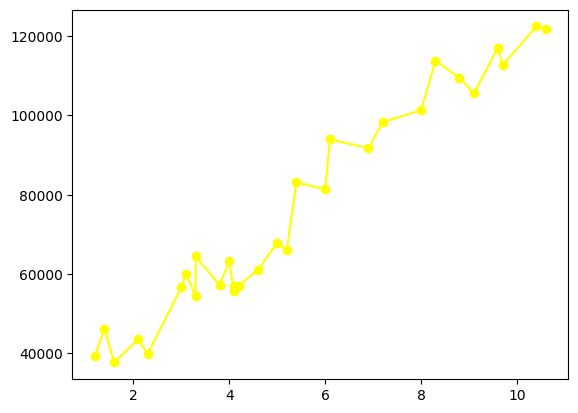

In [3]:
X = h['YearsExperience']
y = h['Salary']
plt.plot(X,y,color='yellow',marker = 'o')

In [11]:
X = h[['YearsExperience']].values #! get all the values tobe 1 col
y = h[['Salary']].values

In [17]:
#! data preprocessing
import torch
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.8)
X_train = torch.tensor(X_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

In [23]:
#! create model:
class LinearRegression(torch.nn.Module):
    def __init__(self,inputdim):
        super(LinearRegression,self).__init__()
        self.linear = torch.nn.Linear(1,inputdim)
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

model = LinearRegression(X_train.shape[0])

losses = torch.nn.MSELoss()
optim = torch.optim.SGD(model.parameters(),lr=0.01)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6, 1])) that is different to the input size (torch.Size([6, 6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/1000], loss: 24969954.0
Epoch [200/1000], loss: 24927472.0
Epoch [300/1000], loss: 24889580.0
Epoch [400/1000], loss: 24855784.0
Epoch [500/1000], loss: 24825644.0
Epoch [600/1000], loss: 24798760.0
Epoch [700/1000], loss: 24774782.0
Epoch [800/1000], loss: 24753400.0
Epoch [900/1000], loss: 24734320.0
Epoch [1000/1000], loss: 24717308.0


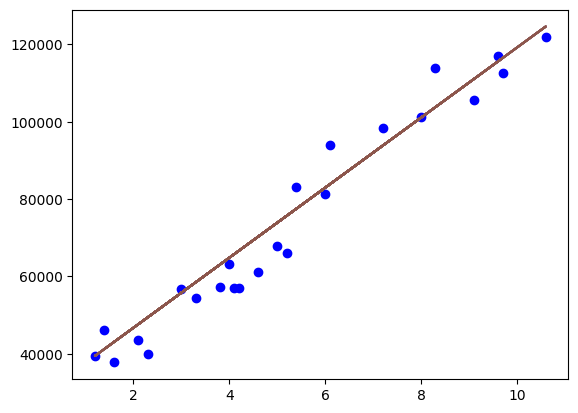

In [31]:
epoch = 1000
for e in range(epoch):
    output = model(X_train)
    loss = losses(output,y_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if(e+1)%100 == 0:
        print(f'Epoch [{e+1}/{epoch}], loss: {loss.item()}')
model.eval()
with torch.no_grad():
    y_pred = model(X_test).numpy()
plt.scatter(X_test,y_test,color='b')
plt.plot(X_test,y_pred)